In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**About Dataset**

This dataset provides comprehensive information on significant earthquakes that have occurred around the world since 1900 with a magnitude of 5 or above. The data includes essential details such as location, date and time, magnitude, depth, and other relevant information about each earthquake.

The dataset is updated weekly and sourced from the United States Geological Survey (USGS), which maintains a global catalog of earthquake information. The dataset includes earthquakes from all regions of the world, from the most seismically active regions like the Pacific Ring of Fire to less active regions like Europe and Africa.

Earthquakes are natural disasters that can cause severe damage to property, loss of life, and environmental damage. The dataset can be used for various research purposes, including studying earthquake patterns and trends over time, examining the impact of earthquakes on human populations and infrastructure, and developing models to predict future earthquake activity.

Researchers can use the dataset to explore the characteristics of earthquakes such as their frequency, magnitude, and location. By analyzing this data, researchers can identify earthquake patterns and trends and use the information to develop better models to predict future earthquakes. This dataset is a valuable resource for researchers and scientists who study earthquakes and their effects on the environment and human life.

**Here's an explanation of each column in the USGS earthquake data:**

time: The time of the earthquake, reported as the number of milliseconds since the Unix epoch (January 1, 1970, 00:00:00 UTC).

latitude: The latitude of the earthquake's epicenter, reported in decimal degrees.

longitude: The longitude of the earthquake's epicenter, reported in decimal degrees.

depth: The depth of the earthquake, reported in kilometers.

mag: The magnitude of the earthquake, reported on various magnitude scales (see magType column below).

magType: The magnitude type used to report the earthquake magnitude (e.g. "mb", "ml", "mw").

nst: The total number of seismic stations used to calculate the earthquake location and magnitude.

gap: The largest azimuthal gap between azimuthally adjacent stations (in degrees).

dmin: The distance to the nearest station in degrees.

rms: The root-mean-square of the residuals of the earthquake's hypocenter location.

net: The ID of the seismic network used to locate the earthquake.

id: A unique identifier for the earthquake event.

updated: The time when the earthquake event was most recently updated in the catalog, reported as the number of milliseconds since the Unix epoch.

place: A human-readable description of the earthquake's location.

type: The type of seismic event (e.g. "earthquake", "quarry blast", "explosion").

horizontalError: The horizontal error, in kilometers, of the location reported in the latitude and longitude columns.

depthError: The depth error, in kilometers, of the depth column.

magError: The estimated standard error of the reported earthquake magnitude.

magNst: The number of seismic stations used to calculate the earthquake magnitude.

status: The status of the earthquake event in the USGS earthquake catalog (e.g. "reviewed", "automatic").

locationSource: The ID of the agency or network that provided the earthquake location.

magSource: The ID of the agency or network that provided the earthquake magnitude.

# **1. Problem Formulation:**

- We want to understand the factors that affect the magnitude of the earthquake
- We want to be able to predict magnitude type of the earthquake based on our data/variables

In [ ]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import matplotlib.animation as animation
from mpl_toolkits.basemap import Basemap
from IPython.display import HTML, display


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler, OneHotEncoder
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
import xgboost as xgb
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet

import graphviz
from sklearn import tree

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# **2. Loading the Raw Data**

In [ ]:
# Loading the data
raw_data = pd.read_csv(r"/content/drive/MyDrive/TML_Group Project/Significant_Earthquakes(USGS).csv")

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head(5)

(102534, 23)


,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,NaN,7.86,mw,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,NaN,5.00,fa,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,3,1901-12-30T22:34:00.000Z,52.00,-160.00,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,4,1902-01-01T05:20:30.000Z,52.38,-167.45,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


# **3. Data Preprocessing**

**3.1. EDA**

In [ ]:
raw_data.columns

Index(['Unnamed: 0', 'time', 'latitude', 'longitude', 'depth', 'mag',
       'magType', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place',
       'type', 'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102534 entries, 0 to 102533
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       102534 non-null  int64  
 1   time             102534 non-null  object 
 2   latitude         102534 non-null  float64
 3   longitude        102534 non-null  float64
 4   depth            102249 non-null  float64
 5   mag              102534 non-null  float64
 6   magType          102534 non-null  object 
 7   nst              31934 non-null   float64
 8   gap              42227 non-null   float64
 9   dmin             22283 non-null   float64
 10  rms              73789 non-null   float64
 11  net              102534 non-null  object 
 12  id               102534 non-null  object 
 13  updated          102534 non-null  object 
 14  place            101645 non-null  object 
 15  type             102534 non-null  object 
 16  horizontalError  20907 non-null   floa

In [ ]:
raw_data.describe()

,Unnamed: 0,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,102534.000000,102534.000000,102534.000000,102249.000000,102534.000000,31934.000000,42227.000000,22283.000000,73789.000000,20907.000000,52821.000000,35534.000000,42553.000000
mean,51266.500000,3.388379,41.019302,62.183232,5.449896,152.287718,63.183534,4.289101,0.959031,7.697102,7.851407,0.167162,55.019270
std,29599.160588,30.026492,121.756969,108.379075,0.482885,125.147681,38.390259,5.251740,0.373715,4.299404,10.683468,0.153595,80.851655
min,0.000000,-77.080000,-179.997000,-4.000000,5.000000,0.000000,6.500000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,25633.250000,-17.835750,-72.050500,12.000000,5.100000,65.000000,36.000000,1.280000,0.810000,6.000000,1.934000,0.059000,12.000000
50%,51266.500000,-1.068500,99.874000,33.000000,5.300000,112.000000,55.000000,2.607000,0.960000,7.510000,4.900000,0.093000,27.000000
75%,76899.750000,29.126250,142.718000,51.300000,5.690000,202.000000,80.600000,5.140500,1.100000,9.200000,9.300000,0.210000,62.000000
max,102533.000000,87.386000,180.000000,700.000000,9.500000,929.000000,360.000000,50.901000,69.320000,99.000000,1091.900000,1.840000,941.000000


In [ ]:
# Investigate all the elements whithin each Feature

for column in raw_data:
    # Handle numerical and string columns differently
    if raw_data[column].dtype == 'object':  # Check if column is of object type
        unique_vals = raw_data[column].unique()  # pandas unique for strings
    else:
        unique_vals = np.unique(raw_data[column])  # numpy unique for numerical types

    nr_values = len(unique_vals)
    if nr_values < 14:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Unnamed: 0 :102534
The number of values for feature time :99948
The number of values for feature latitude :72037
The number of values for feature longitude :79202
The number of values for feature depth :11530
The number of values for feature mag :314
The number of values for feature magType :26
The number of values for feature nst :735
The number of values for feature gap :1849
The number of values for feature dmin :8796
The number of values for feature rms :266
The number of values for feature net :21
The number of values for feature id :98344
The number of values for feature updated :96376
The number of values for feature place :60493
The number of values for feature type :6 -- ['earthquake' 'nuclear explosion' 'explosion' 'rock burst' 'mine collapse'
 'volcanic eruption']
The number of values for feature horizontalError :1317
The number of values for feature depthError :3104
The number of values for feature magError :335
The number of values for feat

In [ ]:
raw_data.isnull().sum()

Unnamed: 0             0
time                   0
latitude               0
longitude              0
depth                285
mag                    0
magType                0
nst                70600
gap                60307
dmin               80251
rms                28745
net                    0
id                     0
updated                0
place                889
type                   0
horizontalError    81627
depthError         49713
magError           67000
magNst             59981
status                 0
locationSource         0
magSource              0
dtype: int64

**3.2. Data Visualization**

In [ ]:
numeric_features = raw_data.select_dtypes(include = [np.number]).columns.tolist()
categorical_features = raw_data.select_dtypes(include = [object]).columns.tolist()

In [ ]:
print("Numerical Columns: ", numeric_features)
print("Categorical Columns: ",categorical_features)

Numerical Columns:  ['Unnamed: 0', 'latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms', 'horizontalError', 'depthError', 'magError', 'magNst']
Categorical Columns:  ['time', 'magType', 'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource', 'magSource']


In [ ]:
# extract year from the date column
raw_data["year"] = pd.to_datetime(raw_data["time"]).dt.year

# create a figure and a map object
fig = plt.figure(figsize=(12, 6))
map = Basemap(projection='robin', resolution='l', area_thresh=1000.0,
              lat_0=0, lon_0=0)

# define the animation function
def animate(i):
    # clear the previous plot
    plt.cla()

    # set the title to the current year
    year = i + 1900
    plt.title("Earthquakes - {}".format(year))

    # draw coastlines and fill continents
    map.drawcoastlines(linewidth=0.5)
    map.drawcountries(linewidth=0.25)
    map.fillcontinents(color='gray')

    # plot the earthquakes for the current year
    year_df = raw_data[raw_data["year"] == year]
    x, y = map(year_df["longitude"].values, year_df["latitude"].values)
    map.scatter(x, y, s=year_df["mag"].values**2, c='red', alpha=0.75)

# create the animation
ani = animation.FuncAnimation(fig, animate, frames=124, interval=500)

HTML(ani.to_html5_video())

plt.close()

display(HTML(ani.to_html5_video()))

Output hidden; open in https://colab.research.google.com to view.

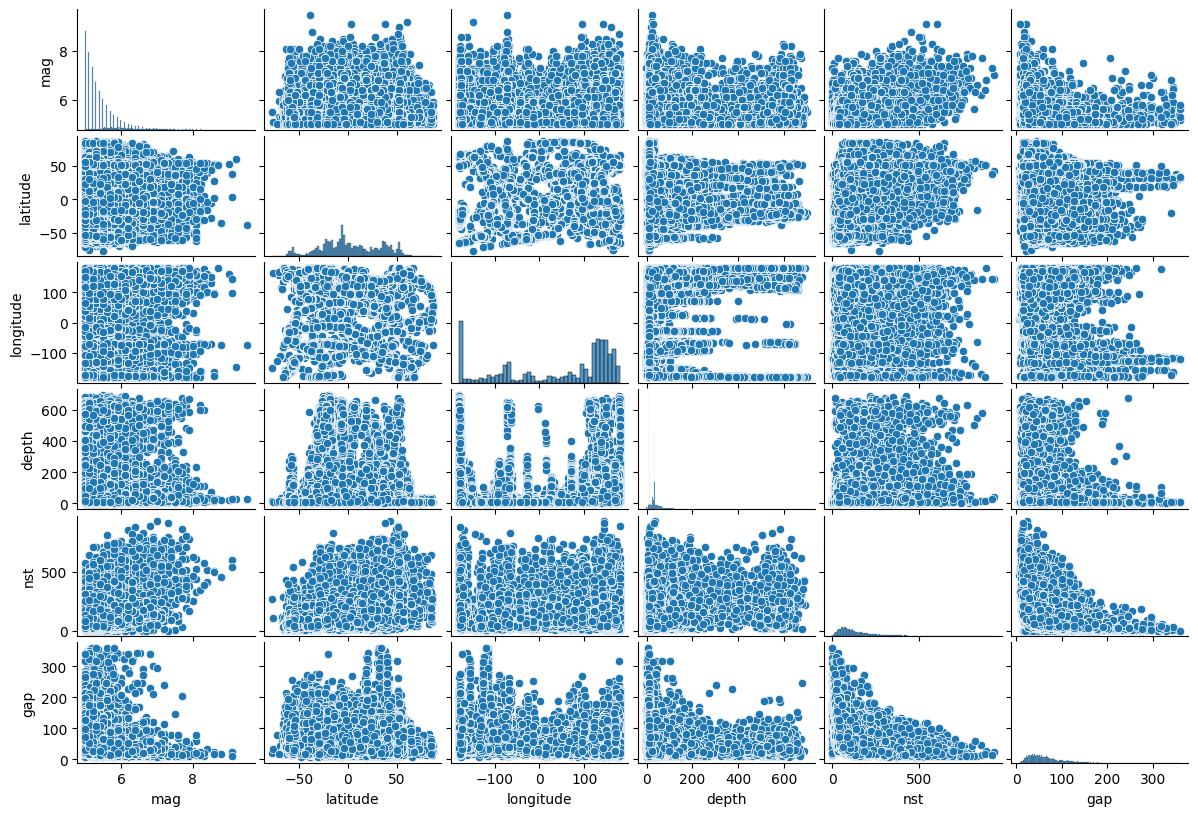

In [ ]:
g = sns.pairplot(raw_data[['mag','latitude', 'longitude', 'depth', 'nst', 'gap']])
g.fig.set_size_inches(12, 8)
plt.show()

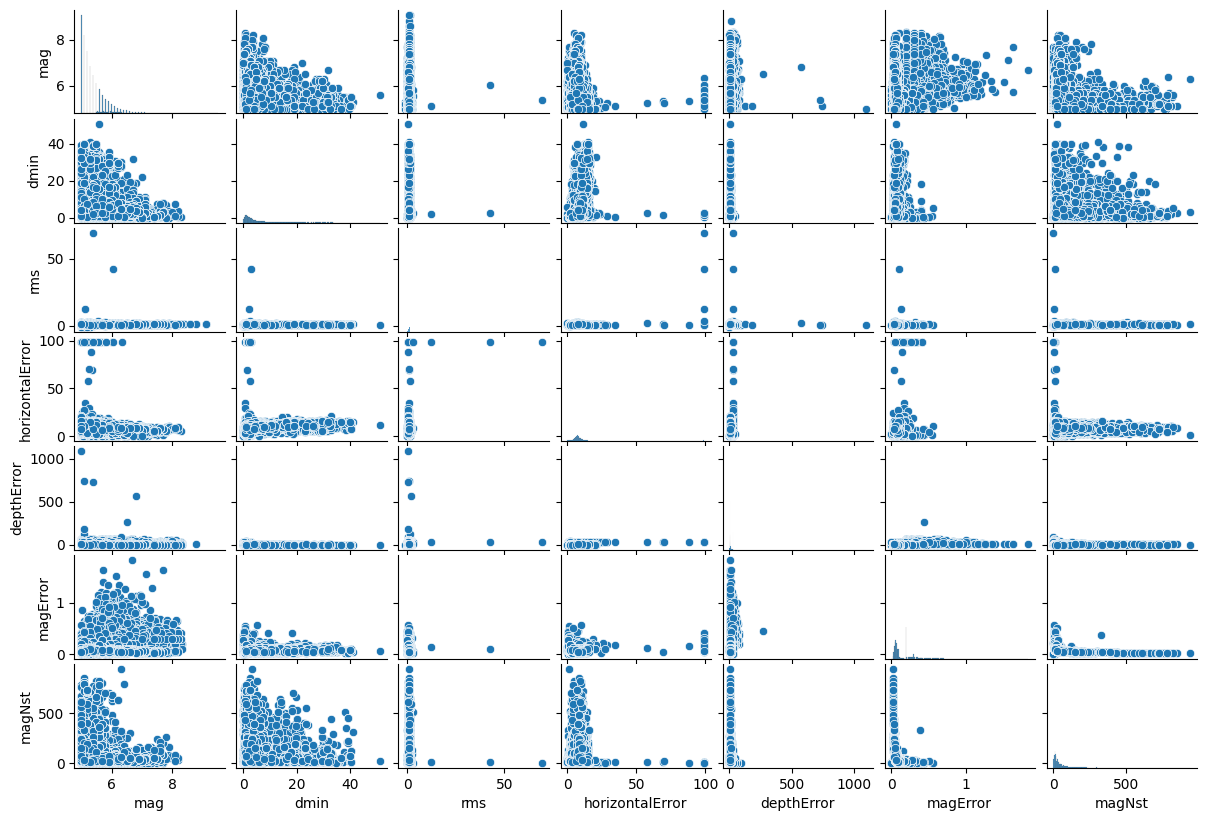

In [ ]:
g = sns.pairplot(raw_data[['mag','dmin', 'rms','horizontalError', 'depthError', 'magError', 'magNst']])
g.fig.set_size_inches(12, 8)
plt.show()

In [ ]:
corr = raw_data.corr(numeric_only = True)

In [ ]:
corr["mag"].sort_values(ascending = False)

mag                1.000000
nst                0.506305
magError           0.463774
depthError         0.178736
rms                0.051991
latitude           0.050394
longitude          0.000501
depth             -0.015359
dmin              -0.021403
magNst            -0.022757
horizontalError   -0.058197
Unnamed: 0        -0.293752
gap               -0.314496
Name: mag, dtype: float64

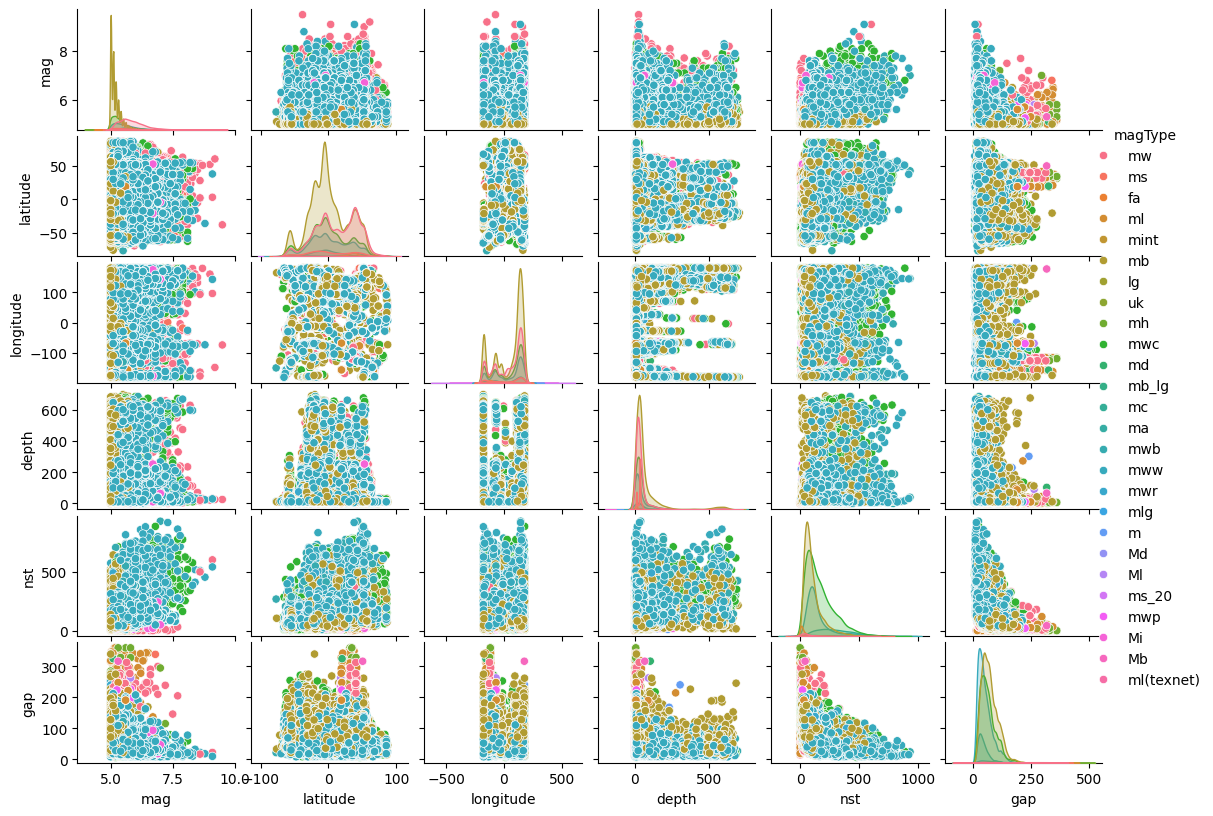

In [ ]:
g = sns.pairplot(raw_data[['mag','latitude', 'longitude', 'depth', 'nst', 'gap', 'magType']], hue = 'magType')
g.fig.set_size_inches(12, 8)
plt.show()

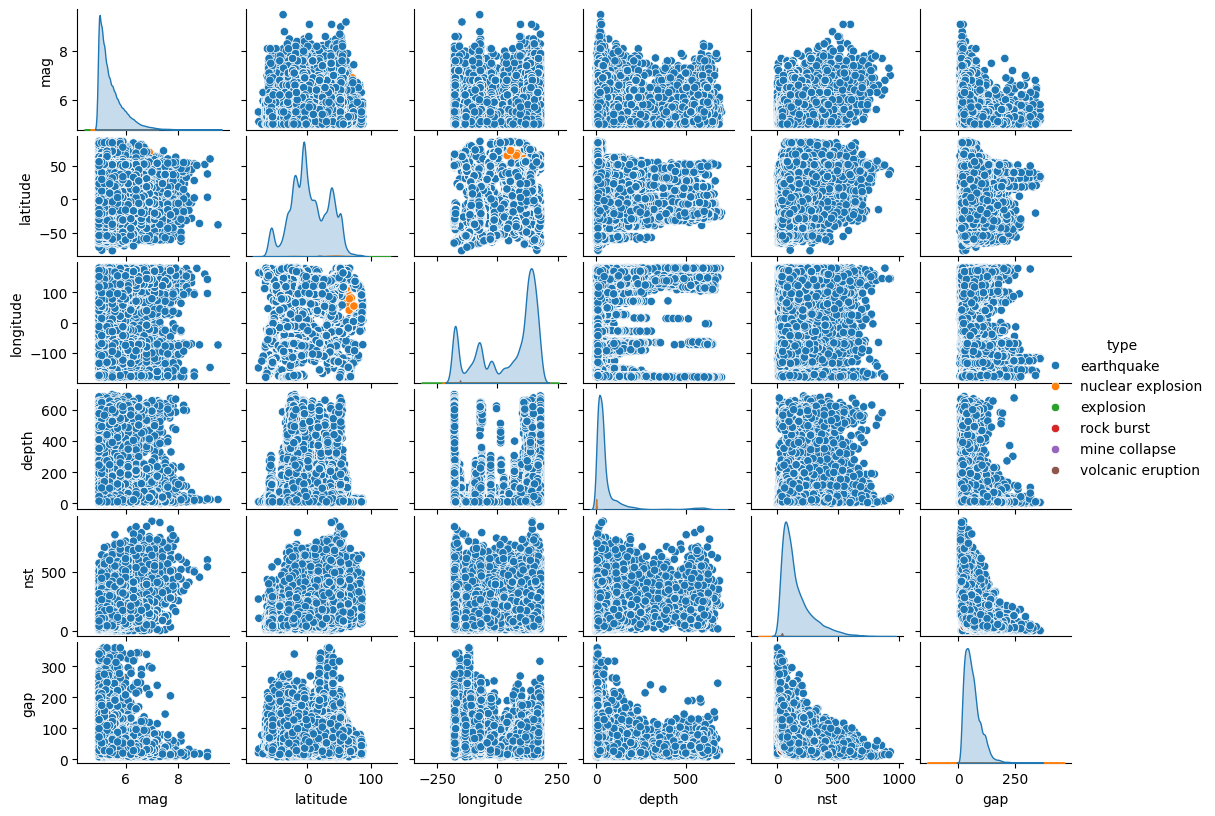

In [ ]:
g = sns.pairplot(raw_data[['mag','latitude', 'longitude', 'depth', 'nst', 'gap', 'type']], hue = 'type')
g.fig.set_size_inches(12, 8)
plt.show()

After reviewing the numerical columns against the magnitude, it is clear that column 'rms','horizontalError', 'depthError' has no significant relation with it. Along with it Categorical Columns:  ['time', 'magType', 'net', 'id', 'updated', 'place', 'type', 'status', 'locationSource', 'magSource'] does not provide any correlation. So we will be removing them.

In [ ]:
median_depth = raw_data['depth'].median()
raw_data['depth'] = raw_data['depth'].fillna(median_depth)

In [ ]:
raw_data.head()

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,33.0,7.86,mw,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,33.0,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,33.0,5.00,fa,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,3,1901-12-30T22:34:00.000Z,52.00,-160.00,33.0,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,4,1902-01-01T05:20:30.000Z,52.38,-167.45,33.0,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


In [ ]:
raw_data.isnull().sum()

Unnamed: 0             0
time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                70600
gap                60307
dmin               80251
rms                28745
net                    0
id                     0
updated                0
place                889
type                   0
horizontalError    81627
depthError         49713
magError           67000
magNst             59981
status                 0
locationSource         0
magSource              0
dtype: int64

# **4.Splitting the Raw Data**

In [ ]:
# Split the data into X & y

X = raw_data.iloc[:, 2:5]
y = raw_data.iloc[:, 5]

print(X.shape)
print(y.shape)

(102534, 3)
(102534,)


In [ ]:
X.head()

,latitude,longitude,depth
0,57.09,-153.48,33.0
1,36.00,-120.50,33.0
2,40.80,-115.70,33.0
3,52.00,-160.00,33.0
4,52.38,-167.45,33.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(82027, 3)
(20507, 3)
(82027,)
(20507,)


**Preprocessing -- (scaling)**

In [ ]:
preprocessor_std = ColumnTransformer(
    transformers=[
        ("scaler", MinMaxScaler(), slice(0, X.shape[1]))
    ]
)

In [ ]:
X.head()

,latitude,longitude,depth
0,57.09,-153.48,33.0
1,36.00,-120.50,33.0
2,40.80,-115.70,33.0
3,52.00,-160.00,33.0
4,52.38,-167.45,33.0


# **5.Model Training & Testing**

In [ ]:
# training with linear regression

lm = LinearRegression(fit_intercept = True)

pipeline = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', lm)])

pipeline.fit(X_train,y_train)

y_pred_train_lm = pipeline.predict(X_train)
y_pred_test_lm = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training and testing dataset

print('The r2 Accuracy on the training dataset prediction is: ',r2_score(y_train,y_pred_train_lm) )
print('The r2 Accuracy on the test dataset prediction is: ',r2_score(y_test,y_pred_test_lm) )

print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train, y_pred_train_lm)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_lm)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train, y_pred_train_lm))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_lm))

The r2 Accuracy on the training dataset prediction is:  0.002703478184022945
The r2 Accuracy on the test dataset prediction is:  0.0027815013934607835

The RMSE  on the training dataset is:  0.4804249732893352
The RMSE  on the testing dataset is:  0.4893535198695264

The MAE  on the training dataset is:  0.3659219061057484
The MAE  on the testing dataset is:  0.3685380476171284


In [ ]:
# training with KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)

pipeline = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', neigh)])

pipeline.fit(X_train,y_train)

y_pred_train_knn = pipeline.predict(X_train)
y_pred_test_knn = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_knn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_knn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_knn)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_knn)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_knn))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_knn))

The R2 score on the training dataset prediction is:  0.48601888059712406
The R2 score on the test dataset prediction is:  -0.03766881149071799

The RMSE  on the training dataset is:  0.344895085012649
The RMSE  on the testing dataset is:  0.49917972245692216

The MAE  on the training dataset is:  0.24345934875102107
The MAE  on the testing dataset is:  0.35532826189431255


In [ ]:
# Training with random forest regressor
random = RandomForestRegressor(max_depth=2, random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', random)])

pipeline.fit(X_train,y_train)

y_pred_train_random = pipeline.predict(X_train)
y_pred_test_random = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_random))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_random))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_random)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_random)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_random))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_random))

The R2 score on the training dataset prediction is:  0.06556837784186731
The R2 score on the test dataset prediction is:  0.0666100716874568

The RMSE  on the training dataset is:  0.4650366548774311
The RMSE  on the testing dataset is:  0.4734336344987687

The MAE  on the training dataset is:  0.34935411614486145
The MAE  on the testing dataset is:  0.3521059063495412


In [ ]:
# Training with Decision Tree regressor
dt = DecisionTreeRegressor(random_state=0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', dt)])

pipeline.fit(X_train,y_train)

y_pred_train_dt = pipeline.predict(X_train)
y_pred_test_dt = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train,y_pred_train_dt))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_dt))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred_train_dt)))
print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test, y_pred_test_dt)))

print("")
# The Mean Absolute Error (MAE)
print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred_train_dt))
print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test, y_pred_test_dt))

The R2 score on the training dataset prediction is:  0.999833051715292
The R2 score on the test dataset prediction is:  -0.4396674072657951

The RMSE  on the training dataset is:  0.0062159054975585975
The RMSE  on the testing dataset is:  0.5879747008104134

The MAE  on the training dataset is:  0.00011866011597807929
The MAE  on the testing dataset is:  0.39764048048633804


In [ ]:
# Training with Support Vector Machine regressor
svr = SVR(kernel='rbf')

pipeline = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', svr)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Predict on the training and test datasets
y_pred_train_svr = pipeline.predict(X_train)
y_pred_test_svr = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_svr))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_svr))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_svr)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_svr)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_svr))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_svr))

In [ ]:
# Training with Polynomial regressor
poly_degree = 2

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor_std),
    ('poly_features', PolynomialFeatures(degree=poly_degree, include_bias=False)),
    ('linear_regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_pred_train_poly = pipeline.predict(X_train)
y_pred_test_poly = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_poly))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_poly))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_poly)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_poly)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_poly))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_poly))

The R2 score on the training dataset prediction is:  0.011026083809262732
The R2 score on the test dataset prediction is:  0.009706619302804476

The RMSE on the training dataset is:  0.47841616031863626
The RMSE on the testing dataset is:  0.4876514181112172

The MAE on the training dataset is:  0.363768629854941
The MAE on the testing dataset is:  0.3666253530566275


In [ ]:
# Training with Elastic net regressor
elastic_net_regressor = ElasticNet(alpha=1.0, l1_ratio=0.5)

pipeline = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', elastic_net_regressor)])

pipeline.fit(X_train, y_train)

y_pred_train_elastic = pipeline.predict(X_train)
y_pred_test_elastic = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_elastic))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_elastic))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_elastic)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_elastic)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_elastic))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_elastic))

The R2 score on the training dataset prediction is:  0.0
The R2 score on the test dataset prediction is:  -5.313226304837215e-05

The RMSE on the training dataset is:  0.48107570222778084
The RMSE on the testing dataset is:  0.4900485298442585

The MAE on the training dataset is:  0.3671344488488224
The MAE on the testing dataset is:  0.37000162327748204


In [ ]:
# Training with XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror')

pipeline = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', xgb_regressor)])

pipeline.fit(X_train, y_train)

y_pred_train_xgb = pipeline.predict(X_train)
y_pred_test_xgb = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_xgb))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_xgb))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_xgb)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_xgb)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_xgb))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_xgb))

The R2 score on the training dataset prediction is:  0.2661794790474705
The R2 score on the test dataset prediction is:  0.17037085150817466

The RMSE on the training dataset is:  0.412105441157347
The RMSE on the testing dataset is:  0.4463438493860727

The MAE on the training dataset is:  0.30305536137229216
The MAE on the testing dataset is:  0.3227700005167318


In [ ]:
# training with neural network regressor

nn = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')

pipeline = Pipeline(steps=[('preprocessor', preprocessor_std), ('regressor', nn)])

pipeline.fit(X_train,y_train)

y_pred_train_nn = pipeline.predict(X_train)
y_pred_test_nn = pipeline.predict(X_test)

In [ ]:
# Model Accuracy on training dataset
print('The R2 score on the training dataset prediction is: ', r2_score(y_train, y_pred_train_nn))
print('The R2 score on the test dataset prediction is: ', r2_score(y_test, y_pred_test_nn))
print("")

# The Root Mean Squared Error (RMSE)
print('The RMSE on the training dataset is: ', sqrt(mean_squared_error(y_train, y_pred_train_nn)))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, y_pred_test_nn)))
print("")

# The Mean Absolute Error (MAE)
print('The MAE on the training dataset is: ', mean_absolute_error(y_train, y_pred_train_nn))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, y_pred_test_nn))

The R2 score on the training dataset prediction is:  0.0604504302540132
The R2 score on the test dataset prediction is:  0.05659683532978521

The RMSE on the training dataset is:  0.46630843504927866
The RMSE on the testing dataset is:  0.4759663147868993

The MAE on the training dataset is:  0.35229342970795124
The MAE on the testing dataset is:  0.3553159232202406


# **6.Hyperparameter Tuning**

In [ ]:
xgb_ = xgb.XGBRegressor()

# Define the parameter grid
param_grid = {
    'max_depth': range(2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=xgb_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=5,
    cv=5,
    verbose=True
)

In [ ]:
grid_search.fit(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=5,
             param_grid={'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': range(2, 10),
                         'n_estimators': range(60, 220, 40)},
             scoring='neg_mean_squared_error', verbose=True)

In [ ]:
best_model = grid_search.best_estimator_
print(best_model)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=60, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [ ]:
y_pred = best_model.predict(X_test)

In [ ]:
r2_score_test = best_model.score(X_test, y_test)

# Print the R² score
print(f"The R² score on the test dataset is: {r2_score_test}")

The R² score on the test dataset is: 0.1525814606169168


In [ ]:
y_pred_test = best_model.predict(X_test)

# Calculate MSE and MAE
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print the MSE and MAE
print(f"The Mean Squared Error on the test dataset is: {mse_test}")
print(f"The Mean Absolute Error on the test dataset is: {mae_test}")

The Mean Squared Error on the test dataset is: 0.20349468375654944
The Mean Absolute Error on the test dataset is: 0.33107937170899165
